- https://medium.com/@vanillaxiangshuyang/self-supervised-learning-on-tabular-data-with-tabnet-544b3ec85cee
- https://colab.research.google.com/drive/1P8Obe07DP3VeOld08ThyT1HnChLip_LO#scrollTo=gvy9vUUNOP0W

- https://www.kaggle.com/code/sisharaneranjana/semi-supervised-pre-training-with-tabnet#%F0%9F%94%8FDescription-of-the-dataset-
- https://dacon.io/en/codeshare/3837

In [1]:
import pandas as pd
import numpy as np
import pickle

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

# 전처리 된 데이터 불러오기

In [2]:
with open("./dataset/creditcard.pkl","rb") as file:
    data = pickle.load(file)

In [3]:
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 데이터 전처리
# Time 을 일중 시간으로 변환
df.loc[:, "Time"] = df.loc[:, "Time"].apply(lambda x : x / 3600 % 24)

# Amount column 은 편차가 크므로 log-scale 로 변환
eps=0.001
df['Amount'] = np.log(df.pop('Amount') + eps)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


# train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.values
labels = np.array(df.pop('Class'))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)
print("===============")
print("X validation shape: ", X_val.shape)
print("y validation shape: ", y_val.shape)
print("===============")
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (139554, 31)
Y train shape:  (139554,)
X validation shape:  (59810, 31)
y validation shape:  (59810,)
X test shape:  (85443, 31)
Y test shape:  (85443,)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val= sc.transform(X_val)

# Network parameters

- https://github.com/dreamquark-ai/tabnet
- https://github.com/dreamquark-ai/tabnet/blob/develop/pretraining_example.ipynb

In [9]:
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier

In [10]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
#     cat_idxs=cat_idxs,
#     cat_dims=cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    n_shared_decoder=1, # nb shared glu for decoding
    n_indep_decoder=1, # nb independent glu for decoding
#     grouped_features=[[0, 1]], # you can group features together here
    verbose=5,
)

# Self Supervised Training

In [11]:
max_epochs = 100

In [12]:
unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_val],
    max_epochs=max_epochs , patience=5,
    batch_size=2048, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.5,
)

epoch 0  | loss: 1.31121 | val_0_unsup_loss_numpy: 0.9990599751472473|  0:00:09s
epoch 5  | loss: 0.9533  | val_0_unsup_loss_numpy: 0.9183300137519836|  0:01:00s
epoch 10 | loss: 0.91548 | val_0_unsup_loss_numpy: 0.9472500085830688|  0:01:45s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_val_0_unsup_loss_numpy = 0.9183300137519836


In [13]:
# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model.predict(X_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [14]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_val)

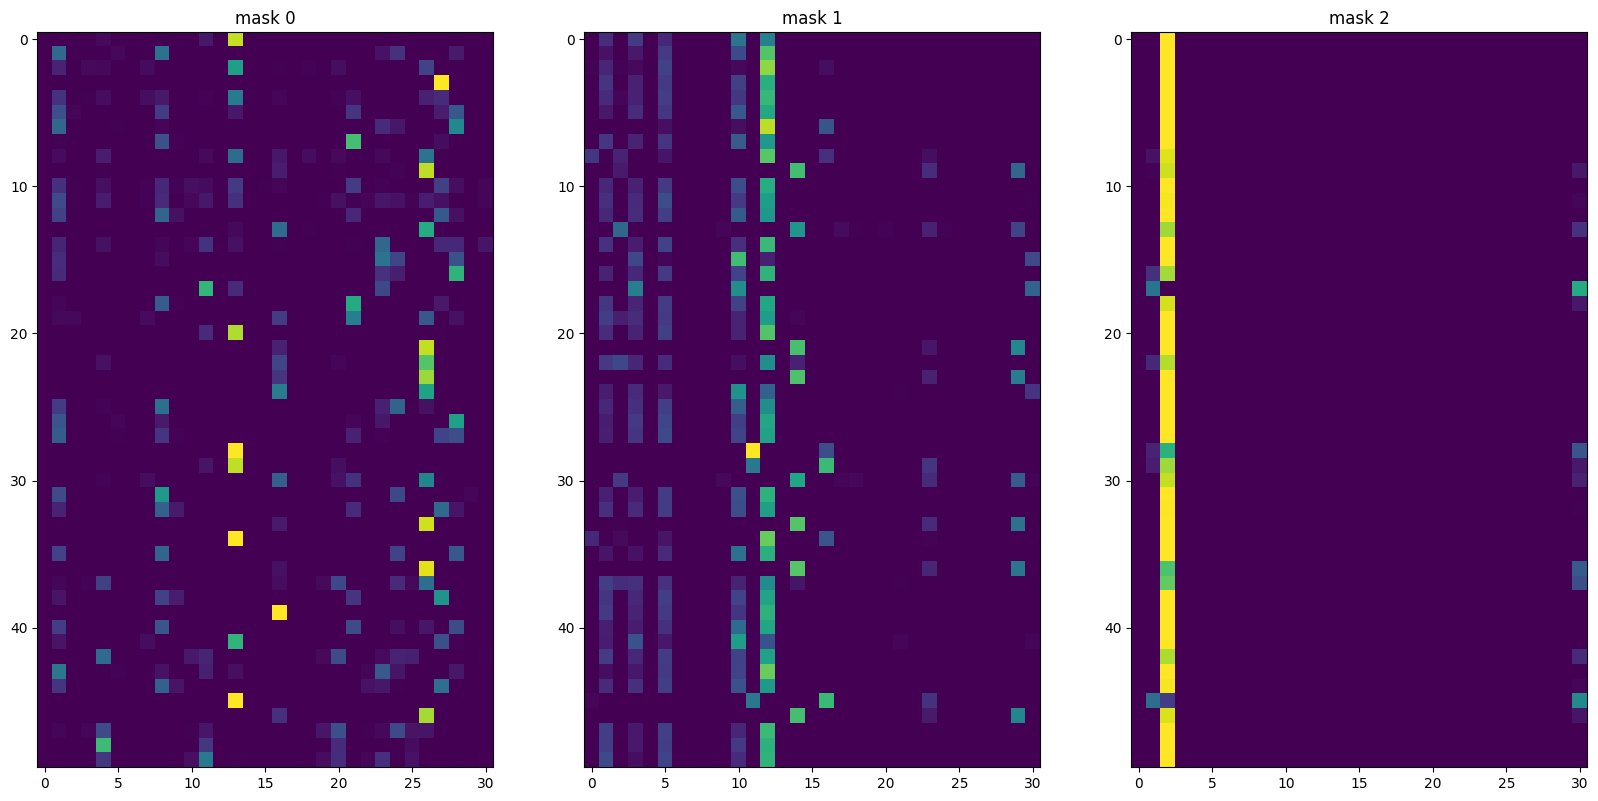

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Save and load the same way as other TabNet models

In [16]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

Successfully saved model at ./test_pretrain.zip


# Training

In [17]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-3),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax', # This will be overwritten if using pretrain model
                       verbose=5,
                      )

In [18]:
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score

class F1_Score(Metric):
    def __init__(self):
        self._name = "f1"
        self._maximize = True

    def __call__(self, y_true, y_score):
        score = f1_score(y_true, (y_score[:, 1]>0.5)*1)
        return score

In [19]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain,
    
) 

epoch 0  | loss: 0.37583 | train_logloss: 0.2617  | train_f1: 0.04098 | valid_logloss: 0.26201 | valid_f1: 0.04219 |  0:00:12s
epoch 5  | loss: 0.00322 | train_logloss: 0.00231 | train_f1: 0.88847 | valid_logloss: 0.00248 | valid_f1: 0.87705 |  0:01:17s
epoch 10 | loss: 0.00164 | train_logloss: 0.00115 | train_f1: 0.94567 | valid_logloss: 0.00142 | valid_f1: 0.94737 |  0:02:25s
epoch 15 | loss: 0.00114 | train_logloss: 0.00091 | train_f1: 0.95335 | valid_logloss: 0.00104 | valid_f1: 0.95575 |  0:03:31s
epoch 20 | loss: 0.00085 | train_logloss: 0.00055 | train_f1: 0.96311 | valid_logloss: 0.00091 | valid_f1: 0.97321 |  0:04:34s
epoch 25 | loss: 0.00071 | train_logloss: 0.00051 | train_f1: 0.96907 | valid_logloss: 0.00085 | valid_f1: 0.97321 |  0:05:36s
epoch 30 | loss: 0.00056 | train_logloss: 0.00051 | train_f1: 0.97917 | valid_logloss: 0.00123 | valid_f1: 0.97321 |  0:06:38s
epoch 35 | loss: 0.00046 | train_logloss: 0.0003  | train_f1: 0.97917 | valid_logloss: 0.00071 | valid_f1: 0.97

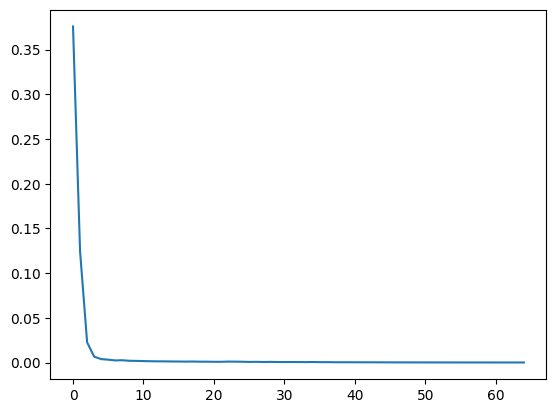

In [20]:
# plot losses
plt.plot(clf.history['loss'])

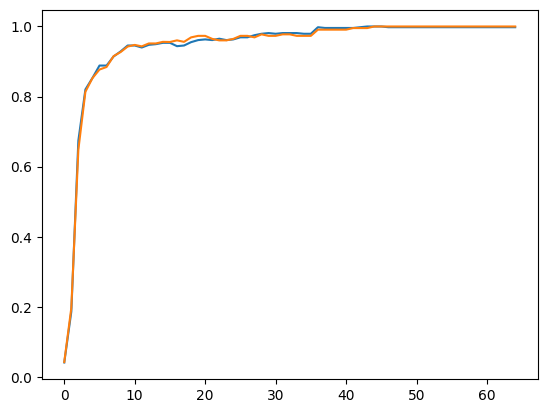

In [21]:
# plot auc
plt.plot(clf.history['train_f1'])
plt.plot(clf.history['valid_f1'])

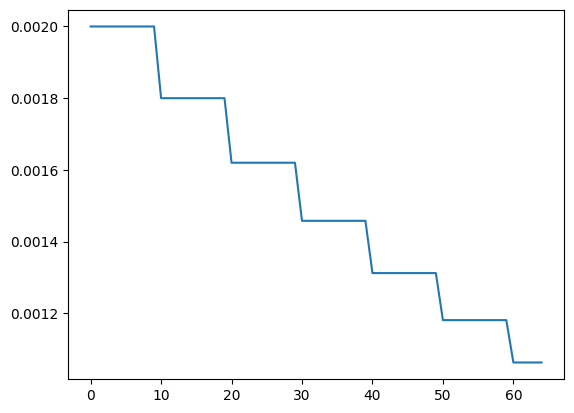

In [22]:
# plot learning rates
plt.plot(clf.history['lr'])

# Predictions

In [23]:
# preds = clf.predict_proba(X_test)
preds = clf.predict(X_test)
test_f1 = f1_score(preds, y_test)

preds_val = clf.predict(X_val)
valid_f1 = f1_score(preds_val, y_val)

print("BEST VALID SCORE : ", clf.best_cost)
print("FINAL TEST SCORE : ", test_f1)

BEST VALID SCORE :  1.0
FINAL TEST SCORE :  1.0


In [24]:
# check that best weights are used
assert np.isclose(valid_f1, np.max(clf.history['valid_f1']), atol=1e-6)

# Save and load Model

In [25]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test_1.zip


In [26]:
# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filepath)

In [27]:
# loaded_preds = loaded_clf.predict_proba(X_test)
loaded_preds = loaded_clf.predict(X_test)
loaded_test_f1 = f1_score(loaded_preds, y_test)

print("FINAL TEST SCORE : ",loaded_test_f1)

FINAL TEST SCORE :  1.0


In [28]:
assert(test_f1 == loaded_test_f1)

# Global explainability : feat importance summing to 

In [29]:
clf.feature_importances_

array([2.31481352e-06, 8.89911958e-04, 1.74290142e-01, 4.04222686e-05,
       1.98402582e-04, 3.73843428e-04, 1.05147061e-10, 2.18262077e-05,
       5.76731748e-05, 1.32794609e-03, 3.04583539e-06, 3.63434526e-05,
       3.17458225e-01, 7.82704972e-04, 1.33183297e-01, 5.29844023e-09,
       3.89476519e-03, 1.07187936e-08, 2.00322505e-06, 3.55631025e-09,
       2.21715031e-06, 1.12776304e-04, 6.89503905e-07, 2.69466729e-05,
       2.30466539e-05, 2.28029074e-08, 6.88045021e-02, 2.48924315e-03,
       7.97984209e-06, 2.95886749e-01, 8.29397373e-05])

# Local explainability and masks

In [30]:
explain_matrix, masks = clf.explain(X_test)

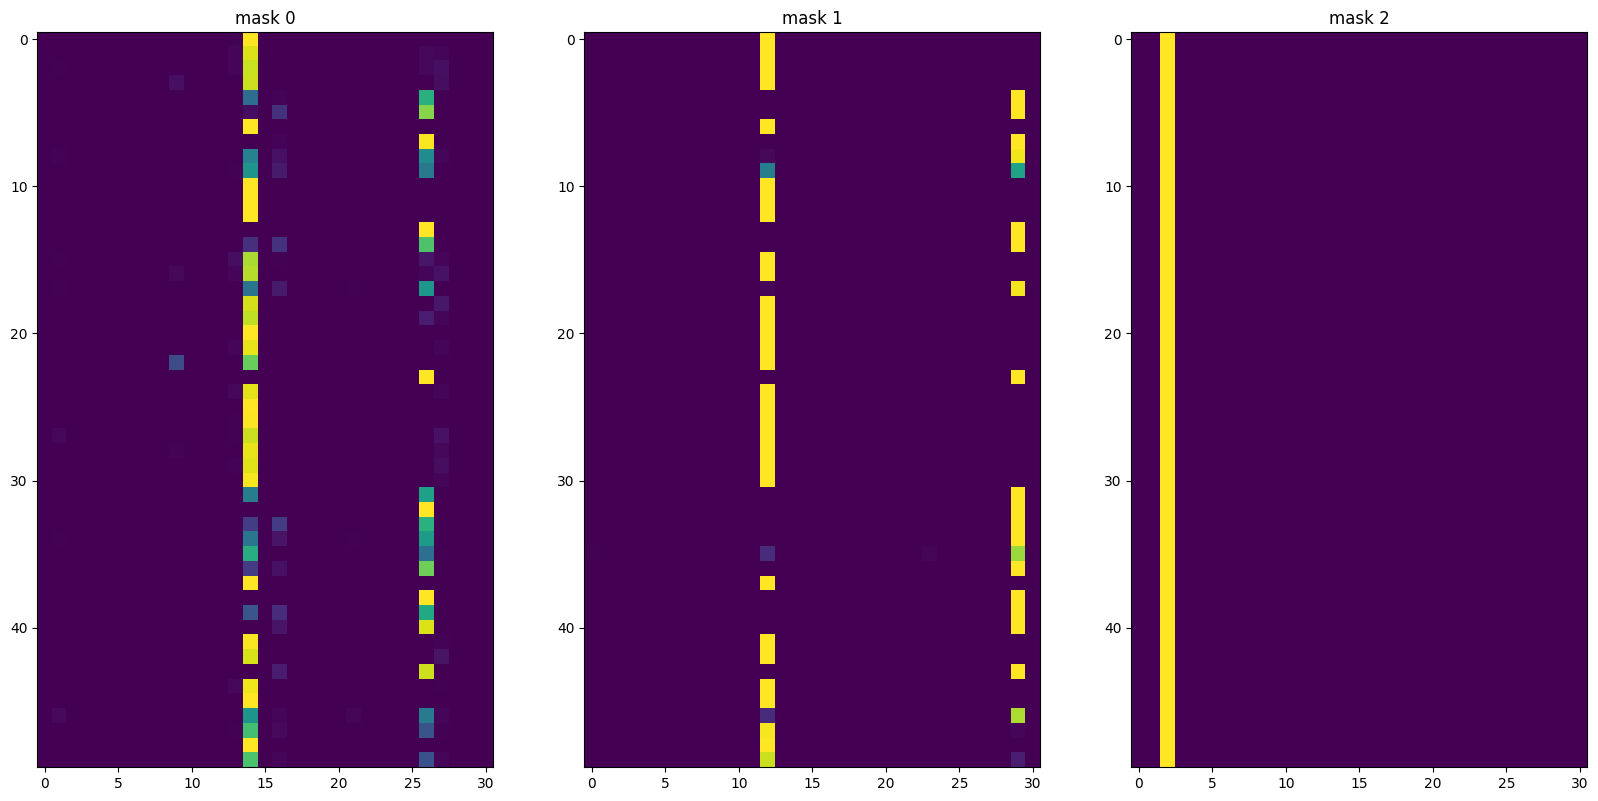

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Pre-trained 된 모델로 test
- ctgan_generated로 test

In [32]:
generated = pd.read_csv('./dataset/ctgan_generated_0320.csv')
generated.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472,1.989026,6.759762,-3.436226,7.508126,-2.003154,-1.453226,4.816805,-9.721434,-6.471587,...,13.760328,0.463365,-2.383923,-0.485486,-1.485571,1.296262,0.110573,0.440638,219.80,1
1,6986,-2.064557,0.925835,-9.001415,2.821149,2.934994,0.809051,-2.381658,-0.717233,-1.331499,...,1.226586,1.401159,-0.804631,-0.842344,-0.119244,0.886038,0.461688,0.224494,357.95,1
2,6986,-0.695426,0.619314,-30.991254,2.067791,-5.309895,1.159233,-2.481335,-0.407266,-7.066150,...,-3.563537,0.418333,-0.282519,0.912088,-1.493152,-0.326489,0.438027,-1.155780,3.22,1
3,7535,1.904601,4.020354,-9.863136,4.722613,-3.603447,-3.186403,0.689895,-10.156282,0.433262,...,2.174024,0.633162,-1.026630,0.347991,-0.447925,0.185000,-2.555247,-1.000923,45.49,1
4,7543,-11.704200,6.025343,-5.197522,1.851403,4.832916,-0.518359,0.454355,-5.387303,-4.300301,...,1.353062,1.197828,-4.923546,0.573469,-0.704693,0.569465,-0.046174,-0.136388,1.00,1


In [33]:
# 데이터 전처리
ctgan = generated.copy()

# Time 을 일중 시간으로 변환
ctgan.loc[:, "Time"] = ctgan.loc[:, "Time"].apply(lambda x : x / 3600 % 24)

# Amount column 은 편차가 크므로 log-scale 로 변환
eps=0.001
ctgan['Amount'] = np.log(ctgan.pop('Amount') + eps)

ctgan.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.131111,1.989026,6.759762,-3.436226,7.508126,-2.003154,-1.453226,4.816805,-9.721434,-6.471587,...,13.760328,0.463365,-2.383923,-0.485486,-1.485571,1.296262,0.110573,0.440638,1,5.392723
1,1.940556,-2.064557,0.925835,-9.001415,2.821149,2.934994,0.809051,-2.381658,-0.717233,-1.331499,...,1.226586,1.401159,-0.804631,-0.842344,-0.119244,0.886038,0.461688,0.224494,1,5.880396
2,1.940556,-0.695426,0.619314,-30.991254,2.067791,-5.309895,1.159233,-2.481335,-0.407266,-7.066150,...,-3.563537,0.418333,-0.282519,0.912088,-1.493152,-0.326489,0.438027,-1.155780,1,1.169692
3,2.093056,1.904601,4.020354,-9.863136,4.722613,-3.603447,-3.186403,0.689895,-10.156282,0.433262,...,2.174024,0.633162,-1.026630,0.347991,-0.447925,0.185000,-2.555247,-1.000923,1,3.817515
4,2.095278,-11.704200,6.025343,-5.197522,1.851403,4.832916,-0.518359,0.454355,-5.387303,-4.300301,...,1.353062,1.197828,-4.923546,0.573469,-0.704693,0.569465,-0.046174,-0.136388,1,0.001000


In [34]:
ctgan_features = ctgan.values
ctgan_labels = np.array(ctgan.pop('Class'))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(ctgan_features, ctgan_labels, test_size=0.5, random_state=0, stratify=ctgan_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [36]:
clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

In [37]:
clf.fit(X_train,y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1'],
)

epoch 0  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 1  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 2  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 3  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 4  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 5  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 6  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15    |  0:00:00s
epoch 7  | loss: 0.0     | train_logloss: 4.99623 | train_f1: 0.19355 | valid_logloss: 5.37832 | valid_f1: 0.15

In [38]:
predicted_test=clf.predict(X_test)
score=f1_score(y_test,predicted_test)
print(score)

0.15625


- ctgan_generated : 0.3146067415730337
- ctgan_generated_0320 / test_size = 0.3 : 0.15686274509803924
- ctgan_generated_0320 / test_size = 0.5 : 0.15625